In [37]:
import numpy as np, matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import interp1d

plt.style.use(['science', 'notebook', 'grid', 'dark_background'])

When a beam of Energy $\epsilon$ is sent through a material, the number of photons (measured in some time inteval), decreases exponentially with distance, due to interactions with the material: $$n(x)=n(0)\exp(-\mu(\epsilon)x)$$ Note that $\mu(\epsilon)$ is the Attenuation Coefficient. In general, a photon beam does'nt have this same energy.

Let $N(\epsilon)$ be th number of photons in the beam with energy less than or equal to $\epsilon$. Then the number of photons at energy $\epsilon$ are $$dN=\frac{dN}{d\epsilon}d\epsilon$$

 Now, the *Fluence* $\Phi(\epsilon)=N(\epsilon)/A$ is defined as the number of photons with energy less than or equal to $epsilon$ $N$ per unit area $A$. This tells us that the differential $d\Phi(\epsilon)$ is $$d\Phi(\epsilon)=\frac{d\Phi(\epsilon)}{d\epsilon}d\epsilon=\frac 1A\frac{dN(\epsilon)}{d\epsilon}d\epsilon$$ Beams are actually measured using this quantity $d\Phi$. In this sense, the fraction $d\Phi/d\epsilon$ is like a Spectral Density of Photon \epsilonnergies.

Suppose we start with the Spectral Density, and what it looks like after we move a distance $x$ through a material. We have $n(x)=n(0)\exp(-\mu(\epsilon)x)$ and so $$\frac{dN(x,\epsilon)}{d\epsilon}=\frac{dN(0,\epsilon)}{d\epsilon}\exp(-\mu(\epsilon)x)$$ We hence have $$\frac{d\Phi(x,\epsilon)}{d\epsilon}=\frac{d\Phi(0,\epsilon)}{d\epsilon}\exp(-\mu(\epsilon)x)$$ So our spectrum depends on the initial state before going through the material, plus the Attenuation Factor.

Let's look at some data for a particular material:

In [38]:
epsilon_data = np.array([ 0.1, 0.2, 0.3, 0.4, 0.5, 0.55, 0.662, 0.8, 1. , 1.25, 1.5, 2. , 3. , 4. , 5. , 6. , 8. , 10.])

mu_data = np.array([0.04999041, 0.04277302, 0.03549048, 0.03178857, 0.02901388, 0.02782302, 0.02567083, 0.02357278, 
                    0.02118703, 0.01894664, 0.01723952, 0.01476657, 0.01176935, 0.00999207, 0.00880421, 0.00793411, 
                    0.00679437, 0.0061037 ])

spectrum_data = np.array([0. , 0.032, 0.06, 0.086, 0.109, 0.131, 0.151, 0.185, 0.212, 0.238, 0.257, 0.274, 0.256, 
                         0.205, 0.147, 0.096, 0.029, 0.002])

And plot $\mu(\epsilon)$ and our spectrum:

Text(0, 0.5, '$\\mu(\\epsilon)\\,|\\,d\\Phi(0,\\epsilon)/d\\epsilon$')

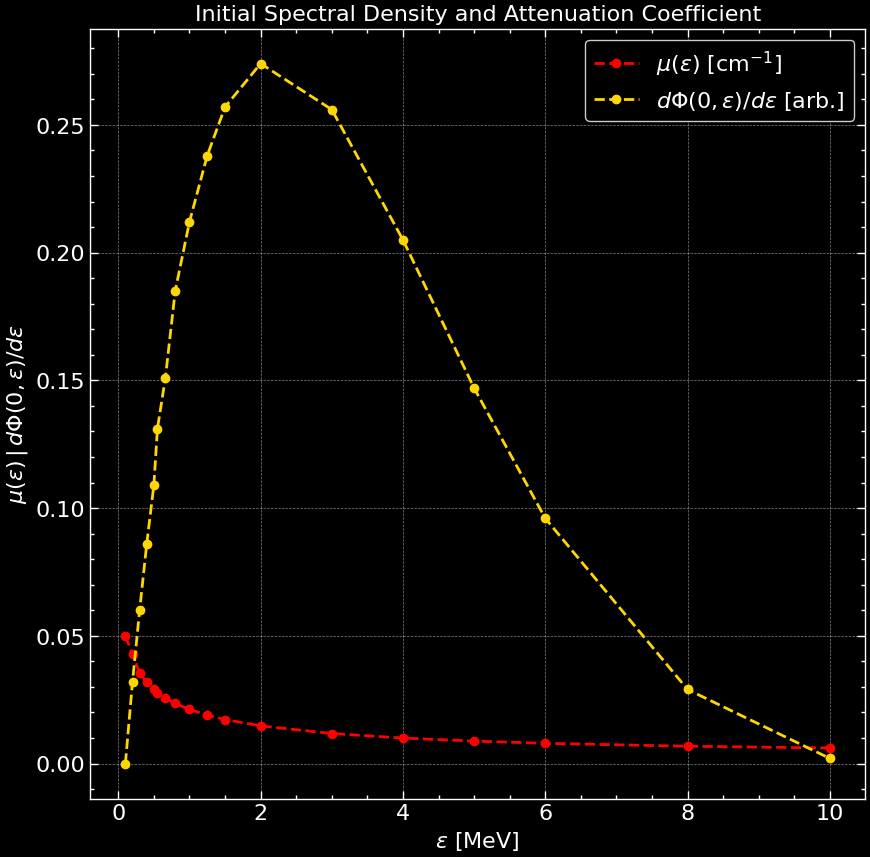

In [39]:
plt.figure(figsize = (10, 10))
plt.plot(epsilon_data, mu_data, 'o--', color = 'red', label = r'$\mu(\epsilon)$ [cm$^{-1}$]')
plt.plot(epsilon_data, spectrum_data, 'o--', color = 'gold', label = r'$d\Phi(0,\epsilon)/d\epsilon$ [arb.]')

plt.legend()
plt.title('Initial Spectral Density and Attenuation Coefficient')
plt.xlabel(r'$\epsilon$ [MeV]')
plt.ylabel(r'$\mu(\epsilon)\,|\,d\Phi(0,\epsilon)/d\epsilon$')

Let's see what happens to it for different $x$ values:

Text(0, 0.5, '$d\\Phi(i,\\epsilon)/d\\epsilon$ [MeV]')

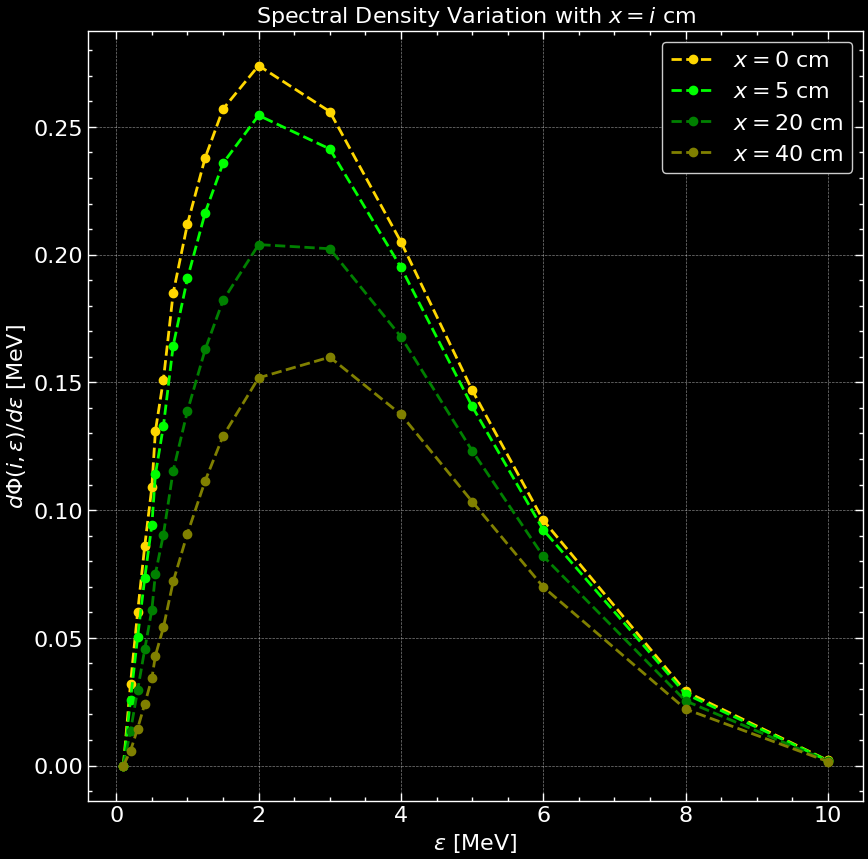

In [40]:
spectrum_data_1 = spectrum_data * np.exp(-mu_data * 5)
spectrum_data_2 = spectrum_data * np.exp(-mu_data * 20)
spectrum_data_3 = spectrum_data * np.exp(-mu_data * 40)

plt.figure(figsize = (10, 10))
plt.plot(epsilon_data, spectrum_data, 'o--', color = 'gold', label = r'$x=0$ cm')

plt.plot(epsilon_data, spectrum_data_1, 'o--', color = 'lime', label = r'$x=5$ cm')
plt.plot(epsilon_data, spectrum_data_2, 'o--', color = 'green', label = r'$x=20$ cm')
plt.plot(epsilon_data, spectrum_data_3, 'o--', color = 'olive', label = r'$x=40$ cm')

plt.legend()
plt.title(r'Spectral Density Variation with $x=i$ cm')
plt.xlabel(r'$\epsilon$ [MeV]')
plt.ylabel(r'$d\Phi(i,\epsilon)/d\epsilon$ [MeV]')

The Expectation Value of $\epsilon^n$ can be used: $$\langle\epsilon^n\rangle=\frac{\int \epsilon^n\,dN(\epsilon)}{\int dN(\epsilon)}=\frac{\displaystyle\int\epsilon^n\,\frac{dN(\epsilon)}{d\epsilon}d\epsilon}{\displaystyle\int\frac{dN(\epsilon)}{d\epsilon}d\epsilon}=\frac{\displaystyle\int \epsilon^n\,\frac{d\Phi(\epsilon)}{d\epsilon}d\epsilon}{\displaystyle\int\frac{d\Phi(\epsilon)}{d\epsilon}d\epsilon}$$ and then the mean, standard deviation and variance can all be found pretty easily. If we wanna compute these integrals, we should first interpolate the data and then, use scipy's `quad` function:

In [41]:
mu_f = interp1d(epsilon_data, mu_data, kind = 'cubic')
spectrum_data_f = interp1d(epsilon_data, spectrum_data, kind = 'cubic')

epsilon_cont = np.linspace(min(epsilon_data), max(epsilon_data), 1000)
mu_cont = mu_f(epsilon_cont)
spectrum_cont = spectrum_data_f(epsilon_cont)

Text(0, 0.5, '$\\mu(\\epsilon)\\,|\\,d\\Phi(0,\\epsilon)/d\\epsilon$')

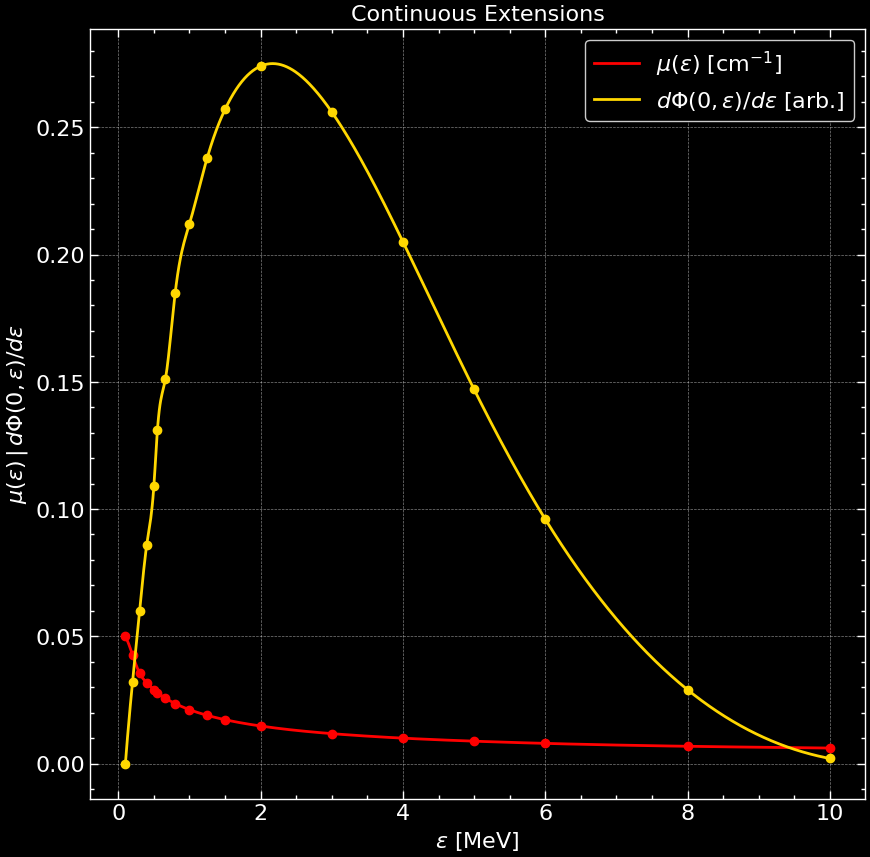

In [42]:
plt.figure(figsize = (10, 10))
plt.plot(epsilon_data, mu_data, 'o', color = 'red')
plt.plot(epsilon_data, spectrum_data, 'o', color = 'gold')

plt.plot(epsilon_cont, mu_cont, '-', color = 'red', label = r'$\mu(\epsilon)$ [cm$^{-1}$]')
plt.plot(epsilon_cont, spectrum_cont, '-', color = 'gold', label = r'$d\Phi(0,\epsilon)/d\epsilon$ [arb.]')

plt.legend()
plt.title('Continuous Extensions')
plt.xlabel(r'$\epsilon$ [MeV]')
plt.ylabel(r'$\mu(\epsilon)\,|\,d\Phi(0,\epsilon)/d\epsilon$')

A function to calculate $\langle\epsilon^n\rangle$:

In [43]:
def epsilon_n(x, n):
    numerator = quad(lambda epsilon: epsilon ** n * spectrum_data_f(epsilon) * np.exp(-mu_f(epsilon) * x), 
                min(epsilon_data), max(epsilon_data))[0]
    
    denominator = quad(lambda epsilon: spectrum_data_f(epsilon) * np.exp(-mu_f(epsilon) * x), 
                min(epsilon_data), max(epsilon_data))[0]
    
    return numerator / denominator

def std_dev(x):
    return np.sqrt(epsilon_n(x, 2) - epsilon_n(x, 1) ** 2)

Let's get some data for the Mean and Standard Deviation of Energy for different $x$ values:

Text(0, 0.5, '$\\langle\\epsilon^n\\rangle\\,|\\,\\sigma_\\epsilon$')

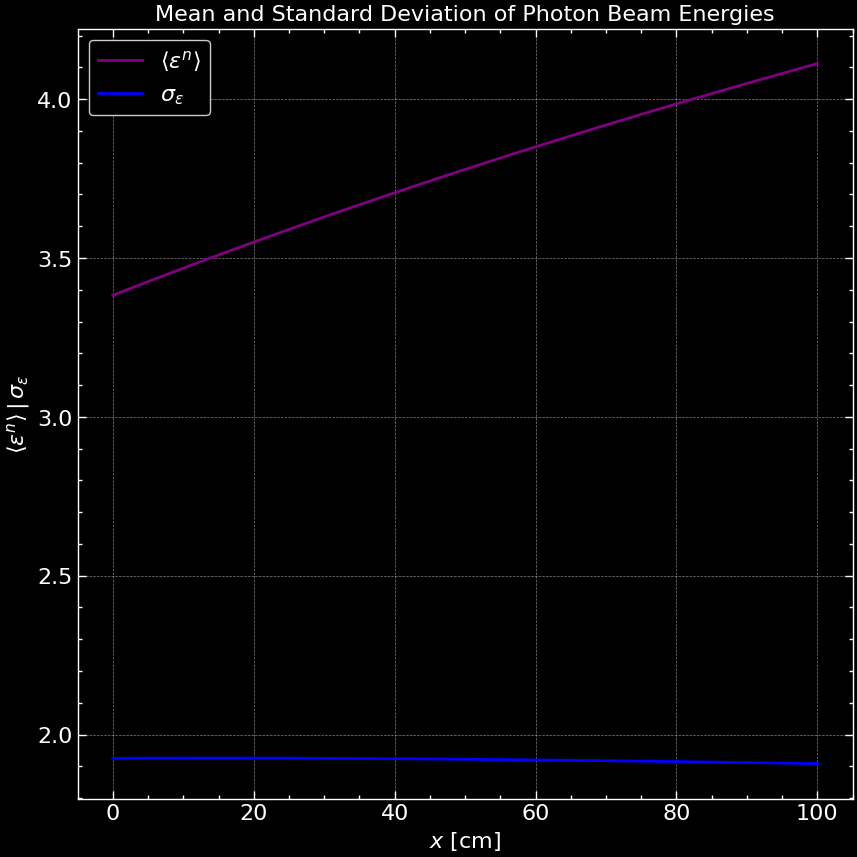

In [44]:
x = np.linspace(0, 100, 100)

epsilon_mean = np.vectorize(epsilon_n)(x, 1)
epsilon_std_dev = np.vectorize(std_dev)(x)

plt.figure(figsize = (10, 10))
plt.plot(x, epsilon_mean, color = 'purple', label = r'$\langle\epsilon^n\rangle$')
plt.plot(x, epsilon_std_dev, color = 'blue', label = r'$\sigma_\epsilon$')

plt.legend()
plt.title('Mean and Standard Deviation of Photon Beam Energies')
plt.xlabel(r'$x$ [cm]')
plt.ylabel(r'$\langle\epsilon^n\rangle\,|\,\sigma_\epsilon$')